In [66]:
%matplotlib inline
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import random


In [67]:
def normal(data, mu, sigma):
    y_noise = [y_ + random.gauss(mu, sigma) for y_ in data]
    std_y = y_noise - data
    return np.array(y_noise), std_y


def get_data(nodes, mu, var, sub, func):
    x = np.arange(0.0, sub, sub / nodes)
    y = np.array([func(x_) for x_ in x])
    y_noise, sub_y = normal(y, mu, var)
    return x, y, y_noise, sub_y

In [68]:
nodes = 50
mu = 0
var = 0.02


def p_1(x_):
    return np.sin(x_ ** 2 + 1)



In [69]:
def gaussian(x, mu, var):
    # return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(((x - mu) ** 2) / (2 * var)))
    return np.exp(-((x - mu) ** 2 / (2 * var)))


def sigmoid(x, mu, var):
    return 1 / (1 + np.exp(-(x - mu) / np.sqrt(var)))


def mle_mine(m, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    w_ = np.linalg.inv(X.T @ X) @ X.T @ Y
    return w_, X


def full_bayesian_mine(m, alpha, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    # Y = Y.reshape(1, -1)
    ss = np.linalg.inv((X.T @ X / var + alpha * np.identity(m))) * (1 / var)
    w_ = ss @ X.T @ Y
    return w_, X, ss


def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [70]:
m = 10
alpha = 0.5
x, y_origin, y_noise, _ = get_data(nodes, mu, var, 1.0, p_1)

w_, X = mle_mine(m, x, y_noise, var, gaussian, 1.0)
y_ = X @ w_
err = squared_loss(y_, y_noise)
print(err.sum())

0.005463763829014363


In [71]:
def display(m, alpha, x, y_, y_origin, y_noise, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha}')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


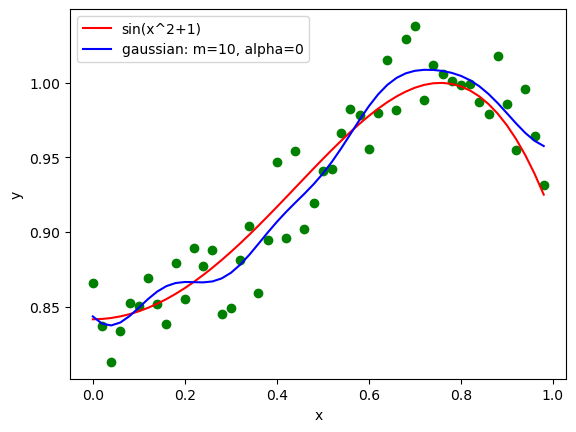

w:  [ 1.03464726 -0.55006908  1.02111392 -1.5816041   1.71305442 -1.74467314
  1.44851441 -1.06574     0.65198248 -0.29454093]


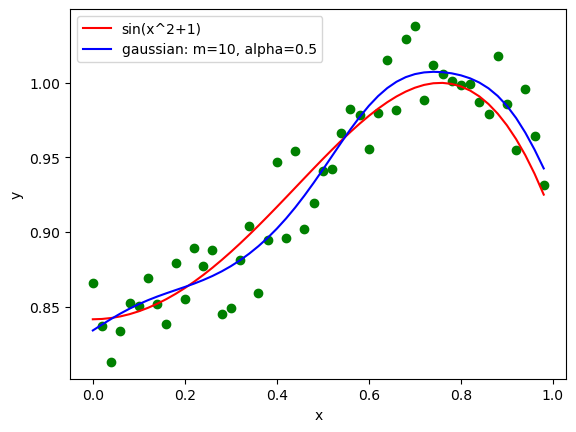

w:  [ 0.80119362  0.03689798  0.00532374  0.01170473  0.04629029  0.0020759
  0.07205259  0.11550422 -0.04432149  0.16770877]


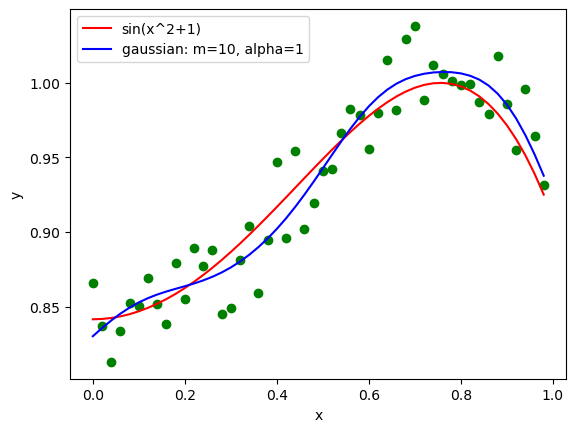

w:  [ 0.78038838  0.06245658 -0.00816051  0.03103183  0.04277717  0.00968052
  0.09041504  0.09989324 -0.02634385  0.17896528]


In [72]:
x, y_origin, y_noise, _ = get_data(nodes, mu, var, 1.0, p_1)
params = [(10, 0), (10, 0.5), (10, 1)]

for m, al in params:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)



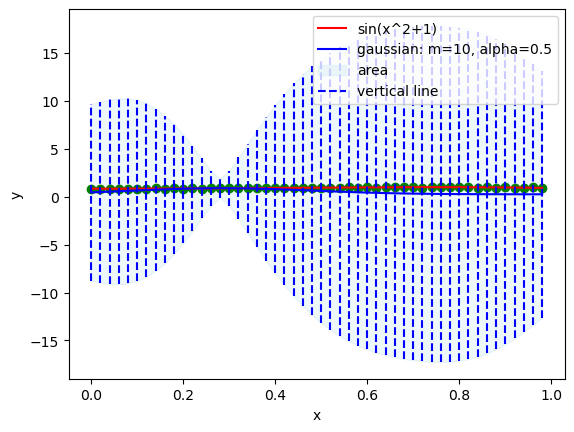

[14]
1


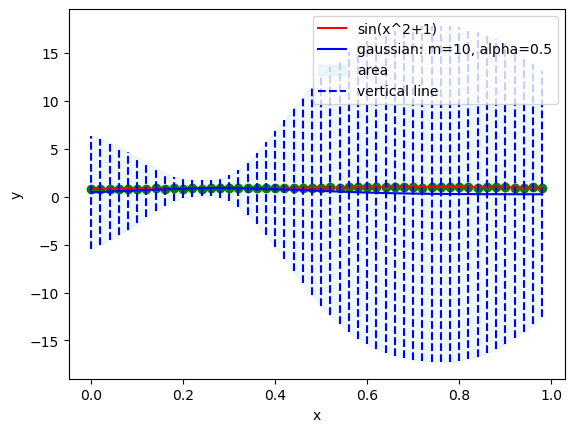

[14, 10]
2


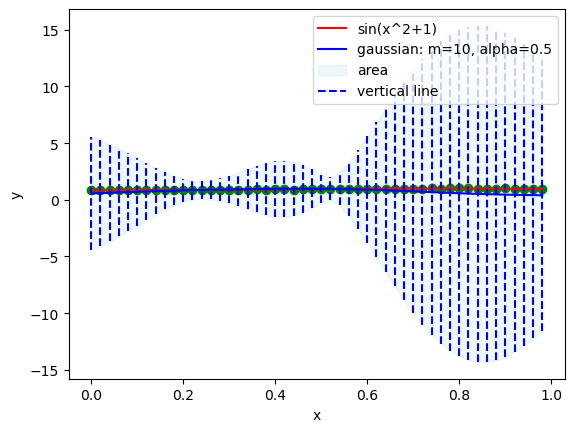

[14, 10, 26]
3


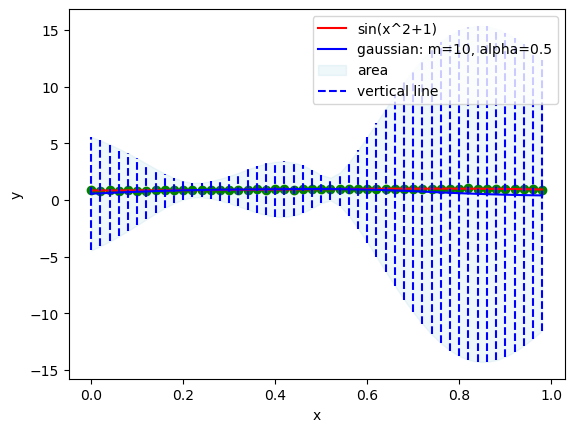

[14, 10, 26, 11]
4


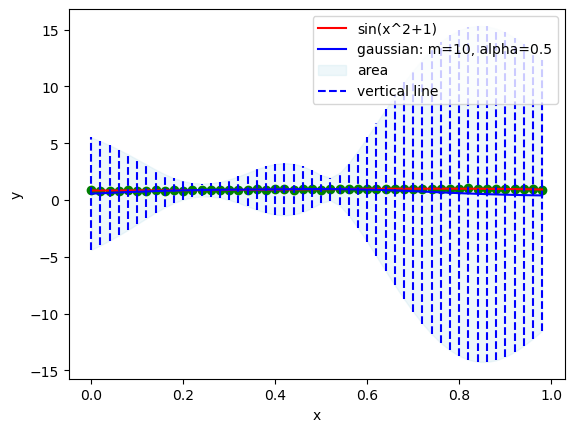

[14, 10, 26, 11, 14]
5


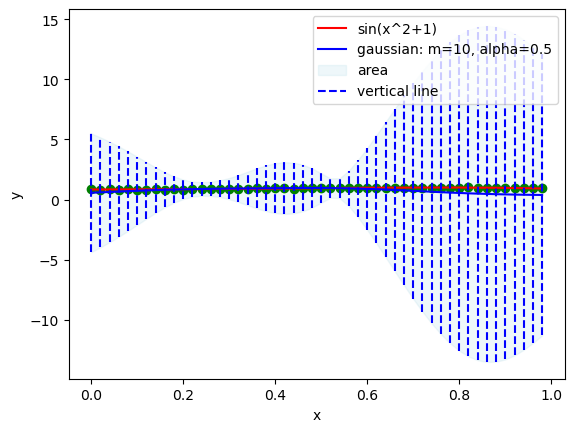

[14, 10, 26, 11, 14, 27]
6


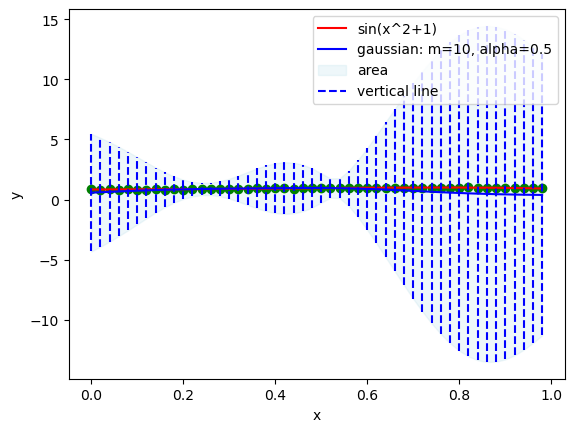

[14, 10, 26, 11, 14, 27, 13]
7


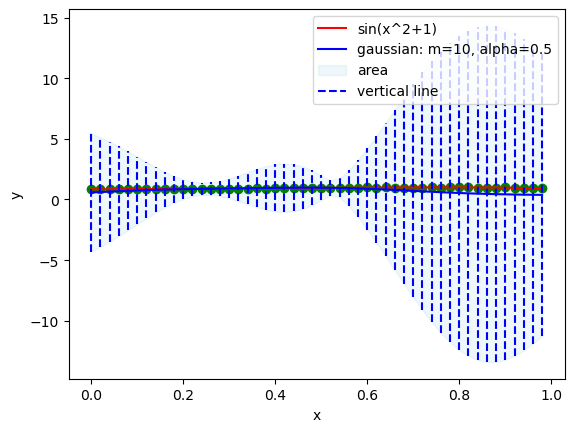

[14, 10, 26, 11, 14, 27, 13, 26]
8


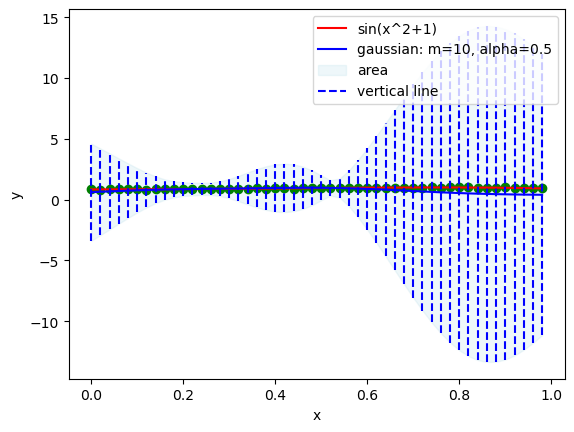

[14, 10, 26, 11, 14, 27, 13, 26, 8]
9


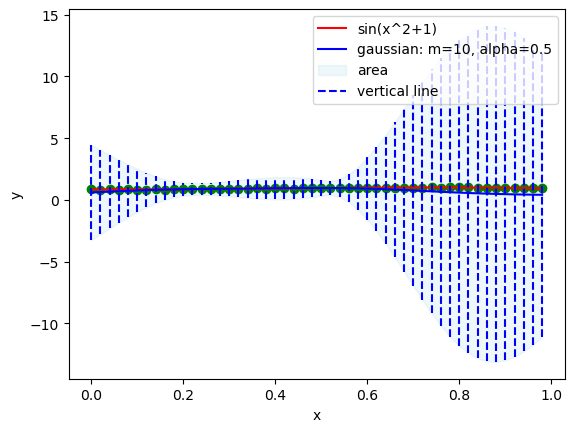

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21]
10


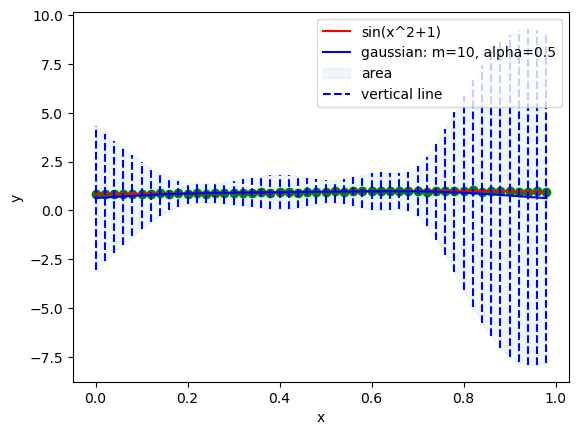

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34]
11


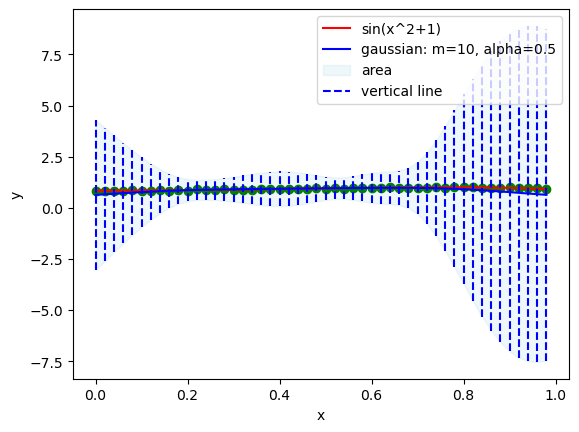

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29]
12


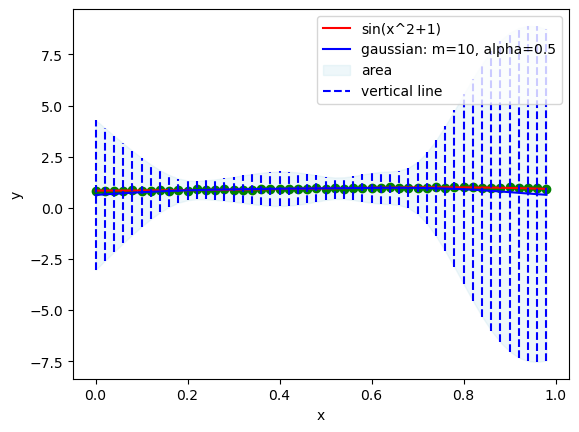

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10]
13


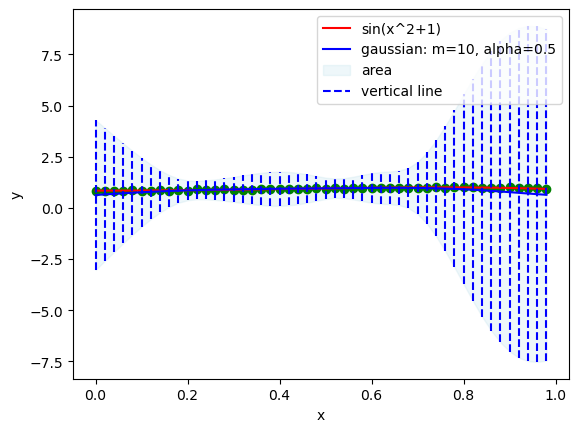

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26]
14


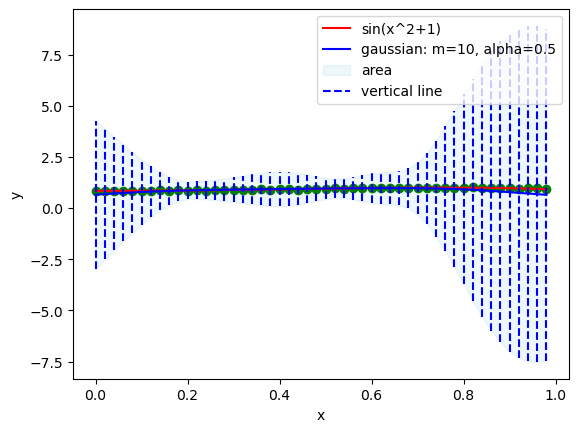

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9]
15


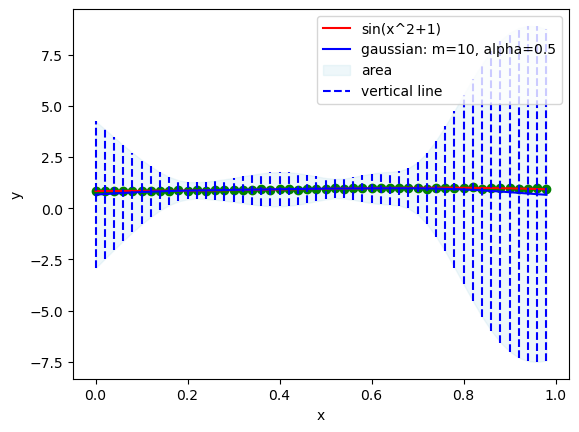

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12]
16


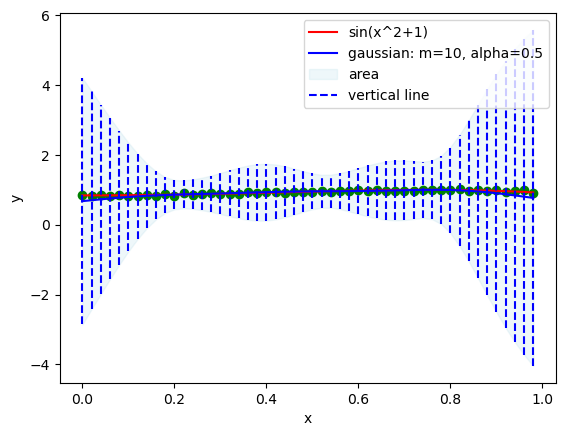

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39]
17


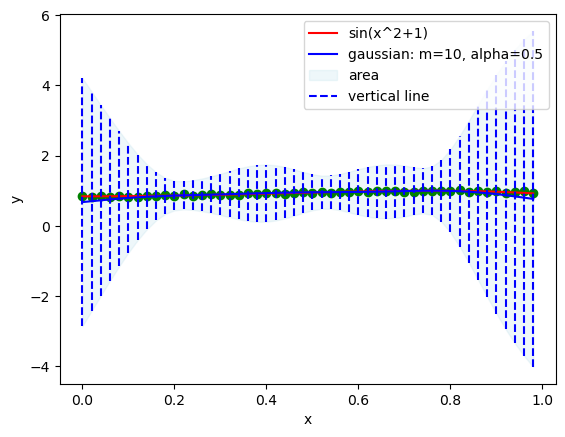

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37]
18


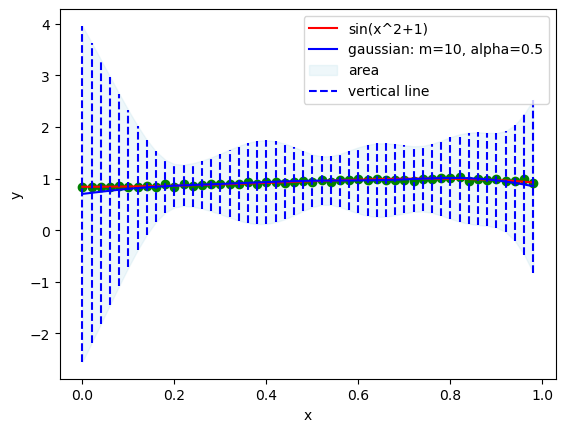

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46]
19


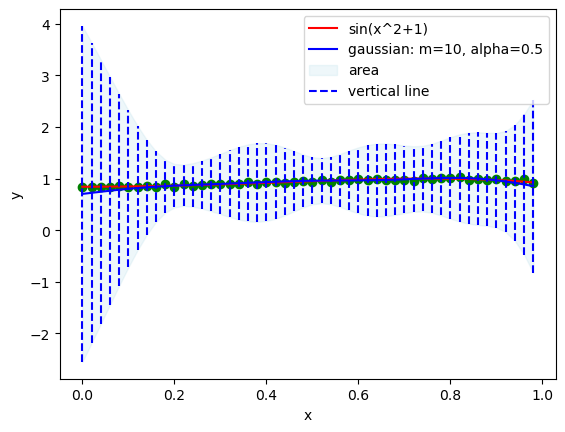

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24]
20


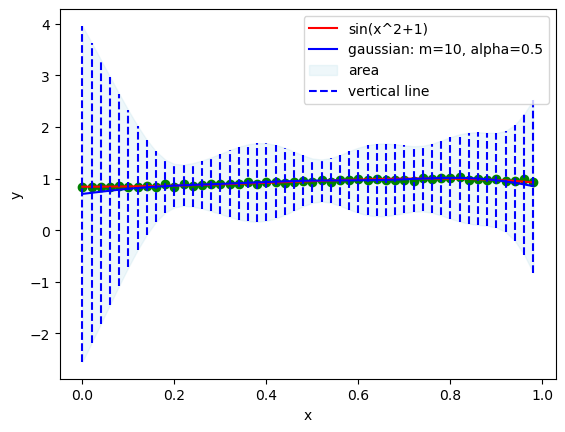

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26]
21


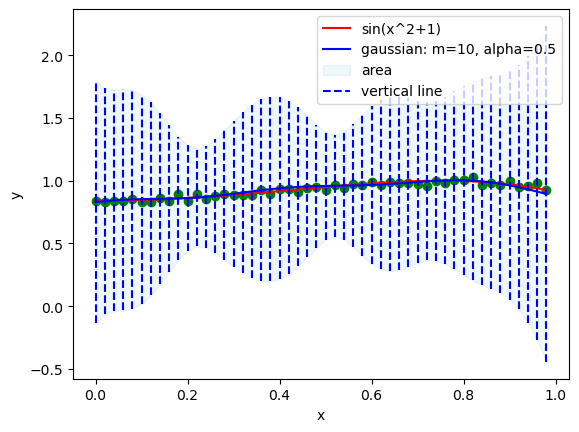

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0]
22


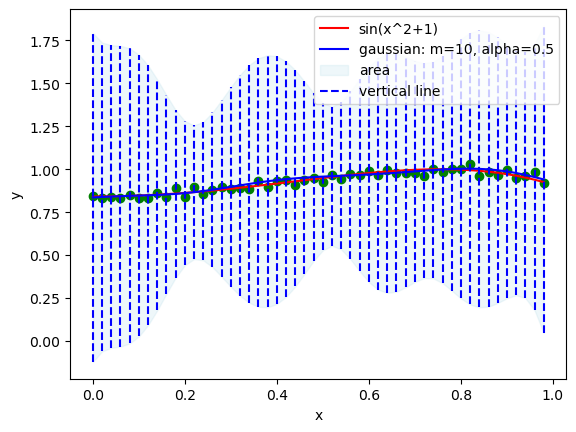

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48]
23


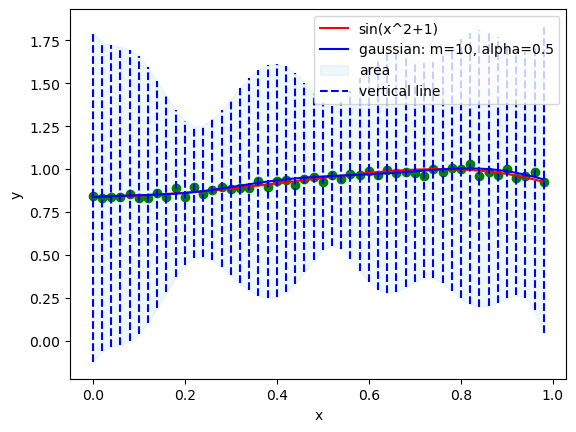

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15]
24


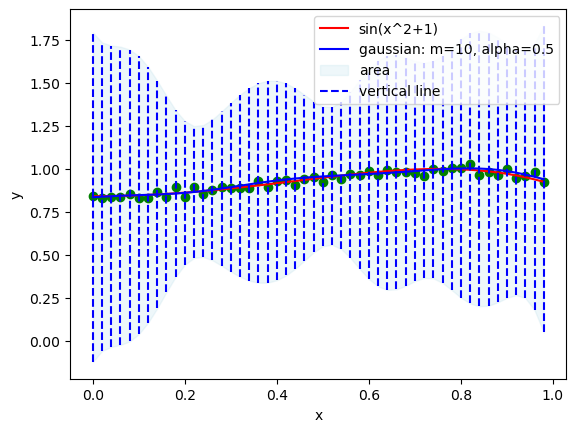

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21]
25


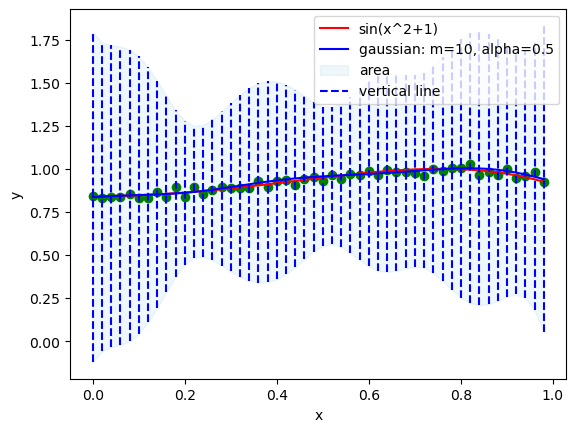

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33]
26


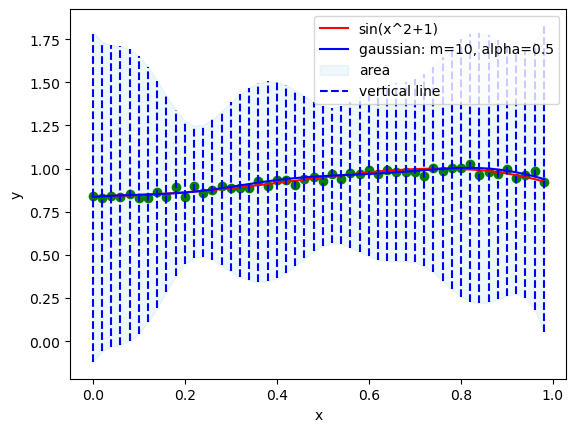

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31]
27


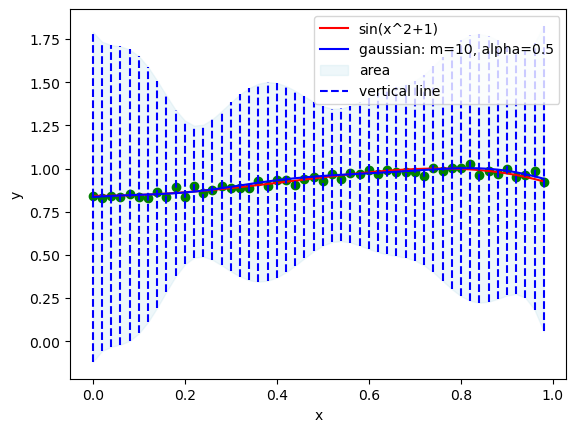

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30]
28


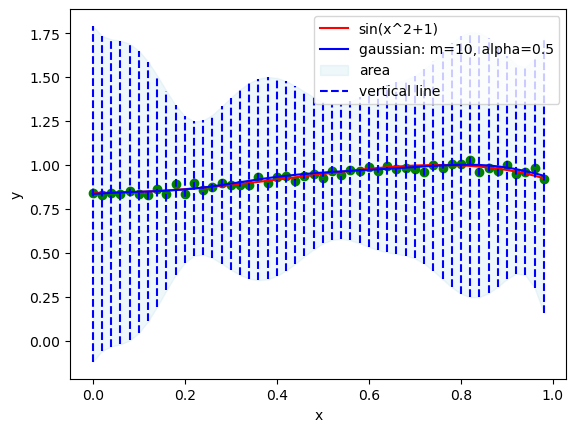

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47]
29


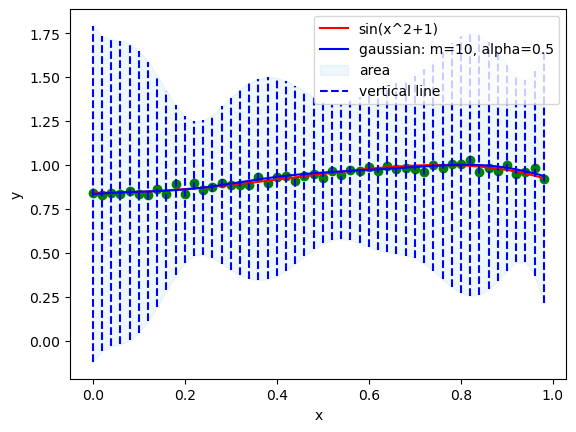

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47]
30


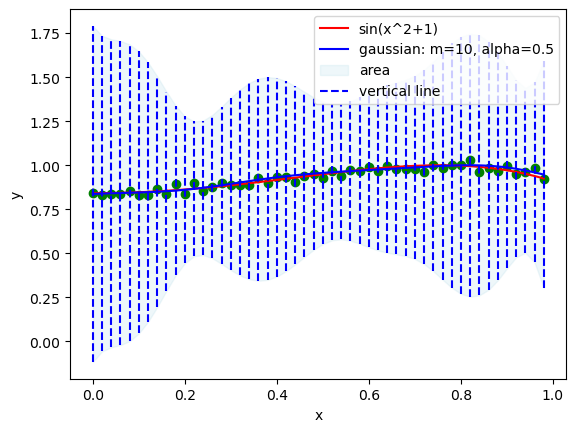

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48]
31


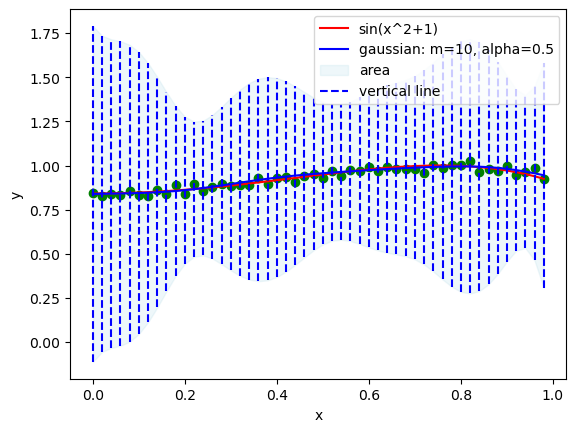

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48, 46]
32


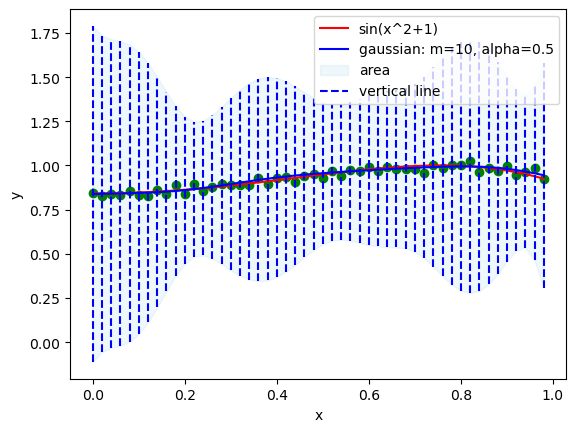

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48, 46, 34]
33


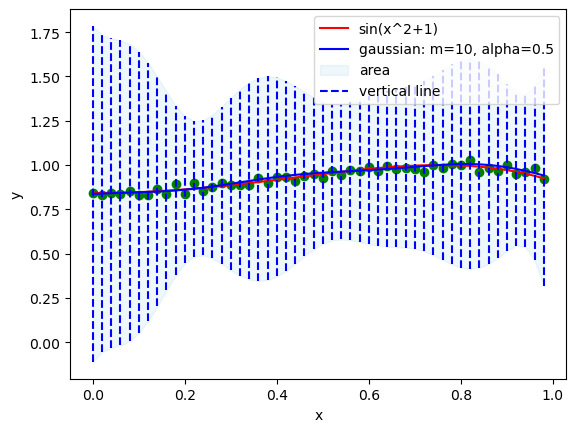

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48, 46, 34, 41]
34


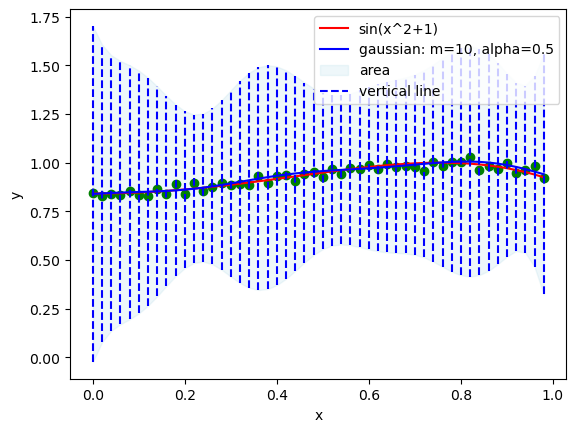

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48, 46, 34, 41, 4]
35


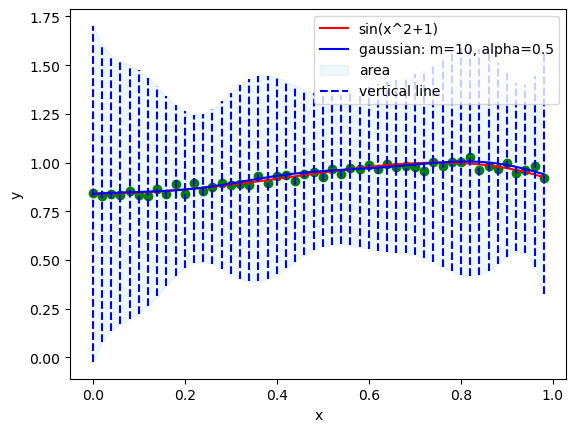

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48, 46, 34, 41, 4, 21]
36


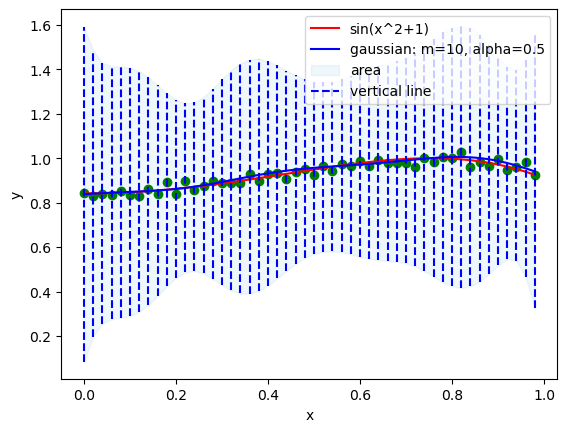

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48, 46, 34, 41, 4, 21, 2]
37


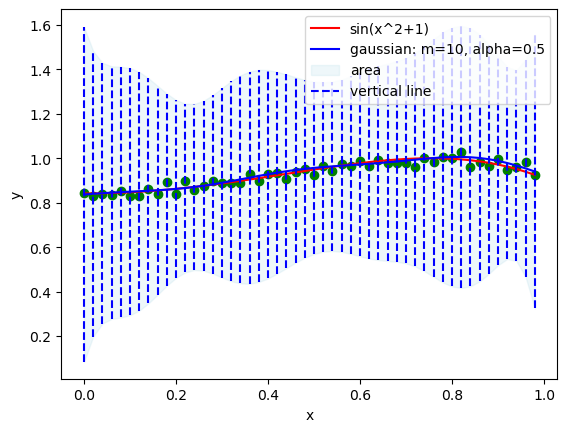

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48, 46, 34, 41, 4, 21, 2, 17]
38


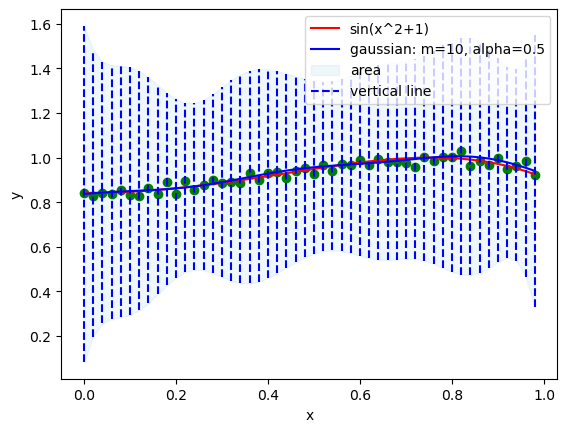

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48, 46, 34, 41, 4, 21, 2, 17, 39]
39


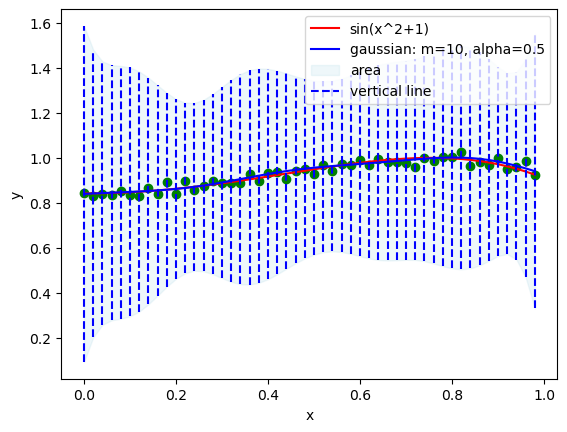

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48, 46, 34, 41, 4, 21, 2, 17, 39, 44]
40


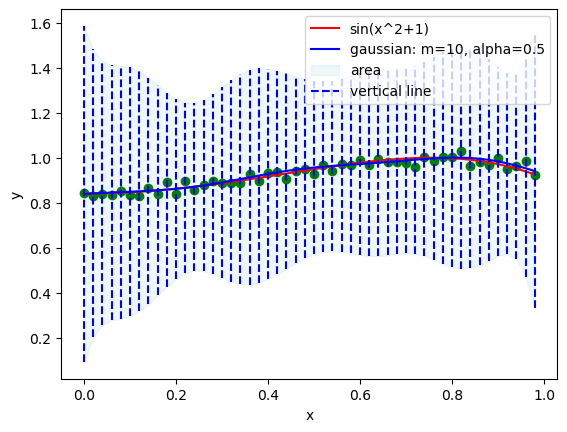

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48, 46, 34, 41, 4, 21, 2, 17, 39, 44, 35]
41


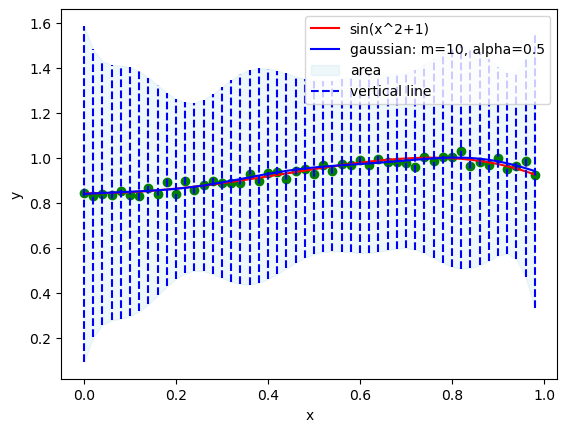

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48, 46, 34, 41, 4, 21, 2, 17, 39, 44, 35, 34]
42


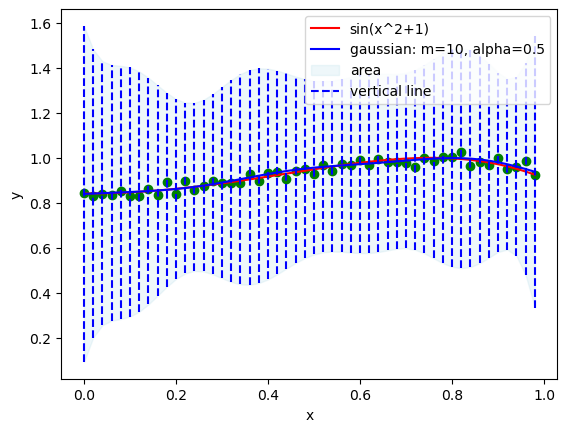

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48, 46, 34, 41, 4, 21, 2, 17, 39, 44, 35, 34, 46]
43


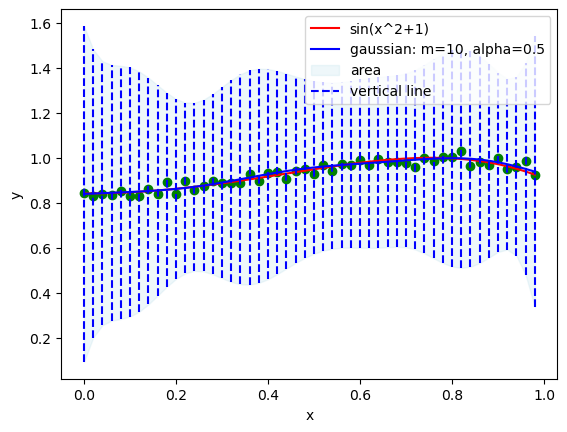

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48, 46, 34, 41, 4, 21, 2, 17, 39, 44, 35, 34, 46, 30]
44


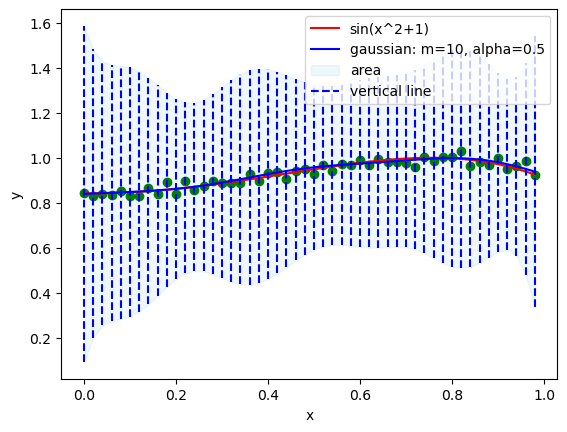

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48, 46, 34, 41, 4, 21, 2, 17, 39, 44, 35, 34, 46, 30, 26]
45


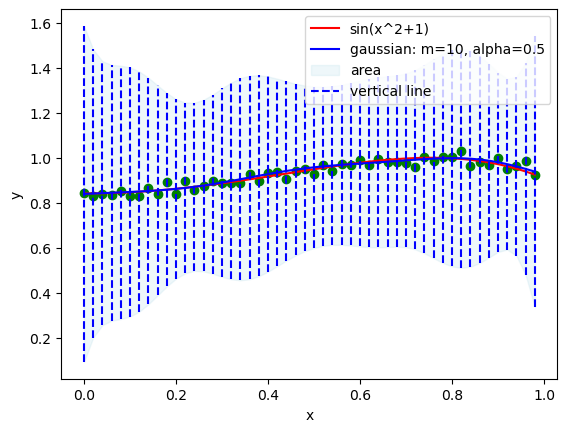

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48, 46, 34, 41, 4, 21, 2, 17, 39, 44, 35, 34, 46, 30, 26, 21]
46


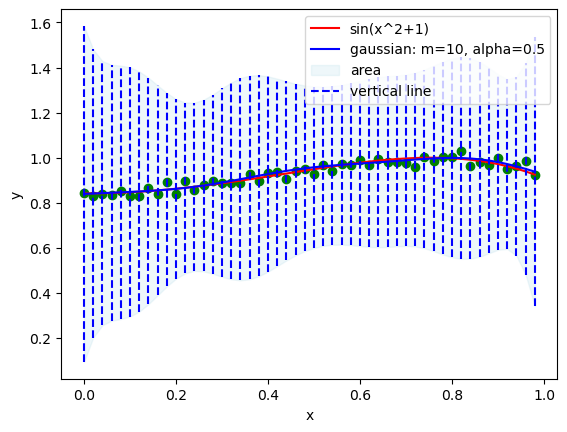

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48, 46, 34, 41, 4, 21, 2, 17, 39, 44, 35, 34, 46, 30, 26, 21, 40]
47


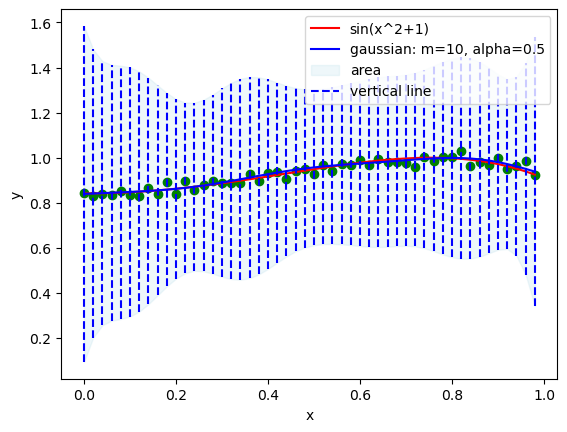

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48, 46, 34, 41, 4, 21, 2, 17, 39, 44, 35, 34, 46, 30, 26, 21, 40, 23]
48


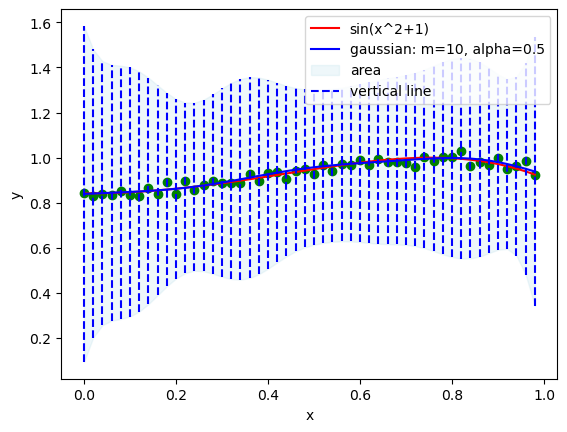

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48, 46, 34, 41, 4, 21, 2, 17, 39, 44, 35, 34, 46, 30, 26, 21, 40, 23, 30]
49


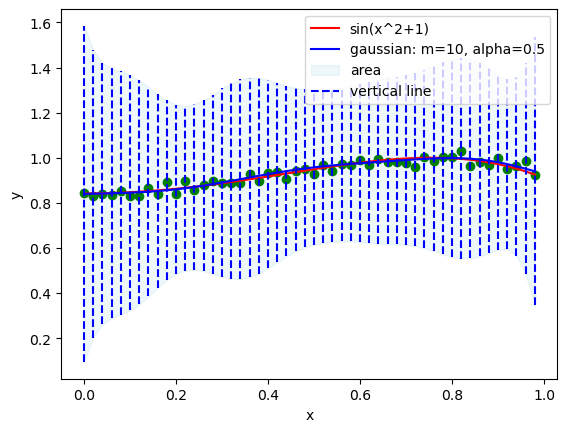

[14, 10, 26, 11, 14, 27, 13, 26, 8, 21, 34, 29, 10, 26, 9, 12, 39, 37, 46, 24, 26, 0, 48, 15, 21, 33, 31, 30, 47, 47, 48, 46, 34, 41, 4, 21, 2, 17, 39, 44, 35, 34, 46, 30, 26, 21, 40, 23, 30, 8]
50


In [74]:
def display_distribution(m, alpha, x, y_, y_origin, y_noise, area, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha}')

    # 固定置信区间的上下界
    lower_bound = -1
    upper_bound = 5

    # 使用plt.fill_between填充置信区间
    plt.fill_between(x, y_ + area, y_ - area, alpha=0.2, color='lightblue', label='area')
    plt.vlines(x, ymin=y_ - area, ymax=y_ + area, color='blue', linestyle='--', label='vertical line')

    # 在区间内添加竖线
    # plt.axvline(x.all(), color='blue', linestyle='--', label='竖线')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


x_arr = []
y_noise_arr = []
i_arr = []
var_2 = 0.02
x, y_origin, y_noise, sub_y = get_data(nodes, mu, var_2, 1.0, p_1)
_, X, _ = full_bayesian_mine(m, alpha, x, y_noise, var_2, gaussian, 1.0)

for i in range(0, 50):
    index = random.randint(0, 49)
    i_arr.append(index)
    # x_arr.append(x[index])
    # y_noise_arr.append(y_noise[index])
    w_, _, ss = full_bayesian_mine(m, alpha, x[i_arr], y_noise[i_arr], var_2, gaussian, 1.0)
    y_ = X @ w_
    var_x = []
    for el in X:
        var_x.append(var_2 + el.T @ ss @ el)

    display_distribution(m, alpha, x, y_, y_origin, y_noise, np.sqrt(var_x), 'gaussian', 'sin(x^2+1)')
    print(i_arr)
    print(i + 1)